In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('./sp_Ef.csv')
X= df[['dacs','Z_A','Z_B','r_A','r_B','R_A','R_B','N_A','N_B','EP_A','EP_B','EA_A','EA_B','IE_A','IE_B']]
Y = df[['Ef']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, shuffle = True,random_state=2021) 

x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
x_test = pd.DataFrame(x_test)
y_test = pd.DataFrame(y_test)

train_index = x_train['dacs']
train_index = pd.DataFrame(train_index)
test_index = x_test['dacs']
test_index = pd.DataFrame(test_index)
x_train_data = x_train[x_train.columns[1:]]
x_train_data = pd.DataFrame(x_train_data)
x_test_data = x_test[x_test.columns[1:]]
x_test_data = pd.DataFrame(x_test_data)

train_data = './train_data.CSV'
test_data = './test_data.CSV'

pd.concat([train_index,y_train,x_train_data], axis=1).to_csv(train_data, index=False, encoding='utf-8')
pd.concat([test_index,y_test,x_test_data], axis=1).to_csv(test_data, index=False, encoding='utf-8')

In [4]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('./train_data.CSV')
df_test = pd.read_csv('./test_data.CSV')
x_train = df_train[['Z_A','Z_B','r_A','r_B','R_A','R_B','N_A','N_B','EP_A','EP_B','EA_A','EA_B','IE_A','IE_B']]
y_train = df_train['Ef']
x_test = df_test[['Z_A','Z_B','r_A','r_B','R_A','R_B','N_A','N_B','EP_A','EP_B','EA_A','EA_B','IE_A','IE_B']]
y_test = df_test['Ef']

kf = KFold(n_splits=10,shuffle = True,random_state=10)
clf =  GradientBoostingRegressor()
n_estimators = [40,60,80,100,300,500,600,800]
random_state =[0,5,10,20,30]
learning_rate = [0.08,0.1,0.15,0.2,0.3,0.5]
max_depth = [1,2,3,4,5]
loss = ['huber']
param_grid = {'n_estimators':n_estimators,'random_state':random_state,'learning_rate':learning_rate,'max_depth':max_depth,'loss':loss}
clf_best = GridSearchCV(clf,param_grid,cv=kf,scoring='neg_mean_squared_error')                                    
clf_best.fit(x_train,y_train)

y_train_pred=clf_best.predict(x_train)
y_test_pred=clf_best.predict(x_test)
train_score_mse = mean_squared_error(y_train,y_train_pred)
test_score_mse = mean_squared_error(y_test,y_test_pred)
train_score_rmse = np.sqrt(mean_squared_error(y_train,y_train_pred))
test_score_rmse  =  np.sqrt(mean_squared_error(y_test,y_test_pred))
train_score_mae = mean_absolute_error(y_train,y_train_pred)
test_score_mae = mean_absolute_error(y_test,y_test_pred)
train_r2_score = r2_score(y_train,y_train_pred)
test_r2_score = r2_score(y_test,y_test_pred)
print('MSE',train_score_mse,test_score_mse)
print('RMSE',train_score_rmse,test_score_rmse)
print('MAE',train_score_mae,test_score_mae)
print('R2',train_r2_score,test_r2_score)
print("best_params：",clf_best.best_params_)

MSE 0.0975510241835497 0.24760568729247992
RMSE 0.3123315933163818 0.4975999269417952
MAE 0.2394073400581903 0.4263675690923679
R2 0.9942184740811151 0.9678415218210367
最好的参数： {'learning_rate': 0.5, 'loss': 'huber', 'max_depth': 1, 'n_estimators': 300, 'random_state': 0}


In [5]:
import joblib
joblib.dump(clf_best.best_estimator_, './gbr.pkl')

['/home/sun/fangzhaolin/0815/Ef/gbr.pkl']

meta NOT subset; don't know how to subset; dropped


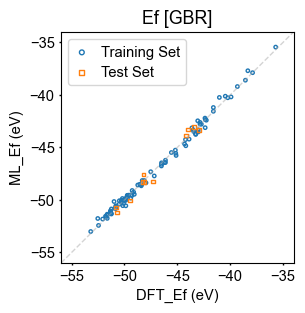

In [16]:
from matplotlib.pyplot import MultipleLocator
font={'family':"Arial",'size':'10.667'}
plt.rc('font',**font)
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize = (3, 3))

ax.scatter(y_train, y_train_pred, label="Training Set",alpha=1, marker='o', s=6, facecolor='none', color='#1f77b4')
ax.scatter(y_test, y_test_pred, label='Test Set',alpha=1, marker='s', s=6, facecolor='none', color='#ff7f0e')
ax.tick_params(axis='both', labelcolor='black', width=1, length=1.1, color='black', which='major')
#ax.tick_params(axis='both', labelcolor='black', width=1, length=2, color='black', which='minor')
#ax.xaxis.set_minor_locator(MultipleLocator(1))
y_major_locator=MultipleLocator(5)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(5)
ax.xaxis.set_major_locator(x_major_locator)
ax.set_xlim(xmin= -56,xmax = -34)
ax.set_ylim(ymin= -56,ymax = -34)
line=ax.plot((0, 1), (0, 1), transform=ax.transAxes, ls='--',c='#A9A9A9',alpha=0.5)
plt.setp(line, linewidth=1) 
plt.title('Ef [GBR]')
plt.xticks(fontsize=10.667)
plt.yticks(fontsize=10.667)
plt.xlabel('DFT_Ef (eV)')
plt.ylabel('ML_Ef (eV)')
plt.legend(markerscale=1.4,frameon=True,fontsize=10.667,labelspacing=0.4,handlelength=1)
#plt.text(-0.5,-6.5,'R$^2$ : \nRMSE : ',fontsize=10.667,linespacing=1.7)
#plt.savefig('gbr_go.eps',dpi=600, bbox_inches = "tight")  
#plt.savefig('gbr_go.png',dpi=600, bbox_inches = "tight")
plt.savefig('gbr_Ef.pdf',dpi=600, bbox_inches = "tight")
plt.show()

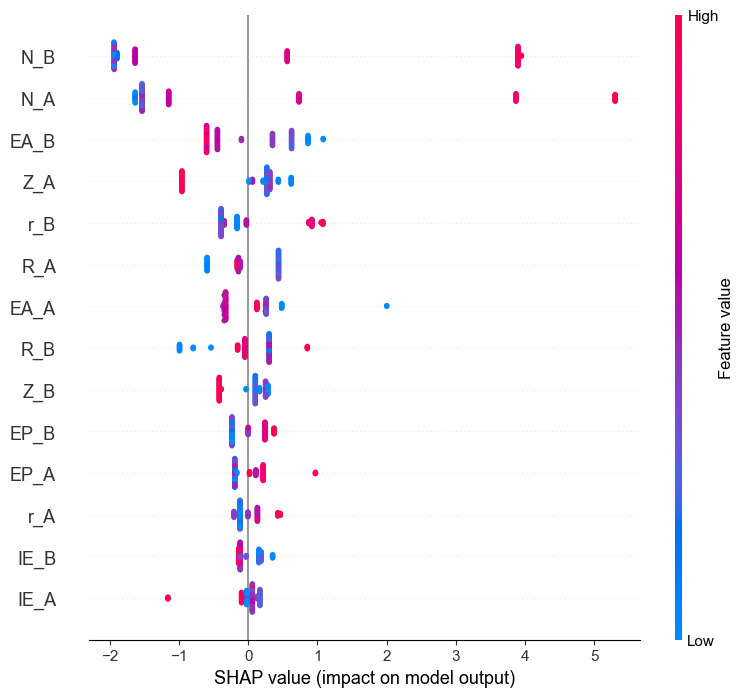

meta NOT subset; don't know how to subset; dropped


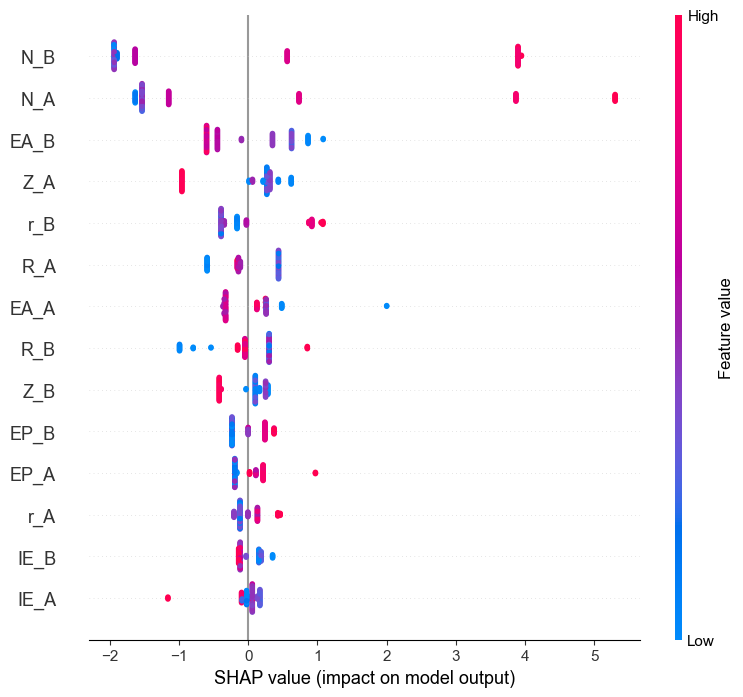

In [58]:
import shap
explainer = shap.TreeExplainer(clf_best.best_estimator_)
  
feature = x_train
shap_values = explainer.shap_values(feature) 
shap.summary_plot(shap_values, feature)
fig = shap.summary_plot(shap_values, feature, show=False)
plt.savefig('shap_gbr.pdf')

In [17]:
import pandas as pd
import numpy as np
import joblib
df_yaituitest = pd.read_csv('./feature.csv')
x_yaituitest = df_yaituitest[['Z_A','Z_B','r_A','r_B','R_A','R_B','N_A','N_B','EP_A','EP_B','EA_A','EA_B','IE_A','IE_B']]

y_yaituitest=clf_best.predict(x_yaituitest)

y_yaituitest=pd.DataFrame(y_yaituitest)
index = df_yaituitest['dacs']

df_pred = './df_pred_Ef.csv'
pd.concat([index,y_yaituitest,x_yaituitest], axis=1).to_csv(df_pred, index=False, encoding='utf-8')

df_pred = pd.read_csv(df_pred, sep=',', encoding='utf-8')
df_pred

,dacs,0,Z_A,Z_B,r_A,r_B,R_A,R_B,N_A,N_B,EP_A,EP_B,EA_A,EA_B,IE_A,IE_B
0,TiTi,-50.670930,22,22,147.0,147.0,187,187,4,4,1.54,1.54,0.075540,0.075540,6.8281,6.8281
1,TiV,-50.970477,22,23,147.0,134.0,187,179,4,5,1.54,1.63,0.075540,0.527660,6.8281,6.7462
2,TiCr,-50.560749,22,24,147.0,128.0,187,189,4,6,1.54,1.66,0.075540,0.675928,6.8281,6.7665
3,TiMn,-49.824251,22,25,147.0,127.0,187,197,4,7,1.54,1.55,0.075540,-0.500000,6.8281,7.4340
4,TiFe,-50.485874,22,26,147.0,126.0,187,194,4,8,1.54,1.83,0.075540,0.153236,6.8281,7.9024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,BiOs,-46.201806,83,76,154.7,135.0,243,216,15,8,1.90,2.20,0.942362,1.077661,7.2855,8.4382
725,BiIr,-45.727791,83,77,154.7,135.5,243,202,15,9,1.90,2.20,0.942362,1.564057,7.2855,8.9670
726,BiPt,-43.492971,83,78,154.7,138.5,243,209,15,10,1.90,2.20,0.942362,2.125100,7.2855,8.9588
727,BiAu,-39.208740,83,79,154.7,144.0,243,217,15,11,1.90,2.40,0.942362,2.308610,7.2855,9.2255
